In [1]:
measurements = [
    {'city' : 'Dubai', 'temperature' : 33.},
    {'city' : 'London', 'temperature' : 12.},
    {'city' : 'San Franscisco', 'temperature' : 18.},
]

In [2]:
measurements

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Franscisco', 'temperature': 18.0}]

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
vec = DictVectorizer()

In [6]:
vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

In [7]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Franscisco', 'temperature']

In [8]:
#for text mining
pos_window = [
  {
  'word-2': 'the',
  'pos-2': 'DT',
  'word-1': 'cat',
  'pos-1': 'NN',
  'word+1': 'on',
  'pos+1': 'PP',
},
# in a real application one would extract many such dictionaries
]

In [10]:
pos_vectorized = vec.fit_transform(pos_window)

In [11]:
pos_vectorized

<1x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [12]:
pos_vectorized.toarray()

array([[1., 1., 1., 1., 1., 1.]])

In [13]:
#Feature_hasher
def token_feature(token, part_of_speech):
    if token.isdigit():
        yield "numeric"
    else: 
        yield "token={}".format(token.lower())
        yield "token, pos = {},{}".format(token, part_of_speech)
    if token[0].isupper():
        yield "all_uppercase"
    yield "Pos={}".format(part_of_speech)
            

In [14]:
from sklearn.feature_extraction import FeatureHasher

In [16]:
raw_x = (token_feature(tok, pos_tagger(tok)) for tok in corpus)

NameError: name 'corpus' is not defined

In [17]:
hasher = FeatureHasher(input_type='string')

In [ ]:
X = hasher.fit_transform(raw_x)

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
vectorizer = CountVectorizer()

In [3]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [1]:
#displaying the corpus
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    ]

In [5]:
X = vectorizer.fit_transform(corpus)

In [6]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [7]:
#seeing how words are analyzed to tokens
analyze = vectorizer.build_analyzer()

In [8]:
analyze("This is a text document to analyze.") == (
       ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [9]:
vectorizer.get_feature_names() == (
['and', 'document', 'first', 'is', 'one',
 'second', 'the', 'third', 'this'])

True

In [10]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [14]:
vectorizer.vocabulary_.get('document')

1

In [16]:
vectorizer.transform(['something completelty new']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [17]:
bigram_vectorizer = CountVectorizer(ngram_range=(1,2),
                                    token_pattern=r'\b\w+\b', min_df=1)

In [18]:
analyze = bigram_vectorizer.build_analyzer()

In [19]:
analyze('Bi-grams are cool!') == (
   ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True

In [20]:
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()

In [21]:
X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]],
      dtype=int64)

In [24]:
feature_index = bigram_vectorizer.vocabulary_.get('is this')

In [23]:
X_2.shape

(4, 21)

In [26]:
X_2[:,feature_index]

array([0, 0, 0, 1], dtype=int64)

In [2]:
#tfidftarnsformer and tdidfvectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
transformer = TfidfTransformer(smooth_idf=False)

In [5]:
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [6]:
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]

In [7]:
tfidf = transformer.fit_transform(counts)

In [8]:
tfidf

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [9]:
tfidf.toarray()

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

In [13]:
transformer = TfidfTransformer()

In [14]:
transformer.fit_transform(counts).toarray()

array([[0.85151335, 0.        , 0.52433293],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.55422893, 0.83236428, 0.        ],
       [0.63035731, 0.        , 0.77630514]])

In [15]:
transformer.idf_

array([1.        , 2.25276297, 1.84729786])

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
#combines both countvectorizer and tfidftransformer
vectorizer = TfidfVectorizer()

In [18]:
vectorizer.fit_transform(corpus)

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [19]:
vec = vectorizer.fit_transform(corpus)

In [20]:
vec.toarray()

array([[0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
        0.        , 0.35872874, 0.        , 0.43877674],
       [0.        , 0.27230147, 0.        , 0.27230147, 0.        ,
        0.85322574, 0.22262429, 0.        , 0.27230147],
       [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
        0.        , 0.28847675, 0.55280532, 0.        ],
       [0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
        0.        , 0.35872874, 0.        , 0.43877674]])

In [3]:
from sklearn.feature_extraction.text import HashingVectorizer

In [4]:
hv = HashingVectorizer(n_features=10)

In [5]:
hv.transform(corpus)

<4x10 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [1]:
from sklearn.feature_extraction import image

In [2]:
import numpy as np

In [4]:
one_image = np.arange(4*4*3).reshape((4,4,3))

In [5]:
one_image[:,:,0]

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45]])

In [6]:
patches = image.extract_patches_2d(one_image,(2,2),max_patches=2,random_state=0)

In [7]:
patches.shape

(2, 2, 2, 3)

In [9]:
patches[:,:,:,0]

array([[[ 0,  3],
        [12, 15]],

       [[15, 18],
        [27, 30]]])

In [10]:
patches =image.extract_patches_2d(one_image,(2,2))

In [11]:
patches.shape

(9, 2, 2, 3)

In [13]:
patches[4,:,:,0]

array([[15, 18],
       [27, 30]])

In [14]:
#reconstructing the original image from patches
reconstructed = image.reconstruct_from_patches_2d(patches, (4,4,3))

In [15]:
np.testing.assert_array_equal(one_image, reconstructed)

In [16]:
#five images
five_images = np.arange(5 * 4 * 4 * 3).reshape(5, 4, 4, 3)

In [19]:
patches = image.PatchExtractor((2,2)).transform(five_images)

In [5]:
-

IndexError: tuple index out of range


Created on Wed Apr 17 07:51:55 2019

@author: jeffnerd

Usage: __main__.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report
  --chi2_select=SELECT_CHI2
                        Select some number of features usoing a chi-squared
                        test
  --confusion_matrix    Print confusion matrix
  --top10               Print ten most discriminative terms per classfor every
                        classifier
  --all_categories      Whether to use all categories or not
  --use_hashing         Use a hashing vectorizer
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer
  --filtered            Remove newsgroup information that is easily
                        overfit:headers, signatures,  and quoting.

Loading 20 newsgroup dataset for categories
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980mb (

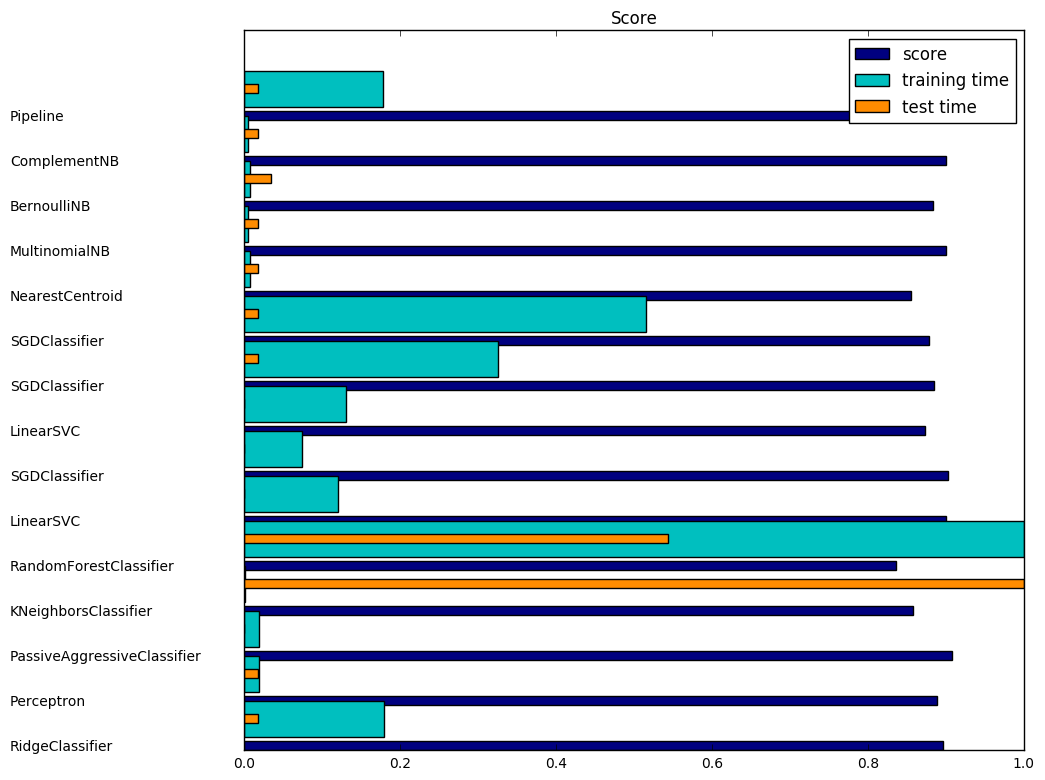

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 17 07:51:55 2019

@author: jeffnerd
"""

from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

#display progress logs on stdout
logging.basicConfig(level = logging.INFO,
                   format = '%(asctime)s% %(levelname)s %(message)s')

#parse commandline arguments
op = OptionParser()
op.add_option("--report", action="store_true", dest="print_report",
             help="Print a detailed classification report")
op.add_option("--chi2_select", action="store",type="int", dest="select_chi2",
             help="Select some number of features usoing a chi-squared test")
op.add_option("--confusion_matrix", action="store_true", dest="print_cm",
             help="Print confusion matrix")
op.add_option("--top10", action="store_true", dest="print_top10",
             help="Print ten most discriminative terms per class"
             "for every classifier")
op.add_option("--all_categories", action="store_true", dest="all_categories",
             help="Whether to use all categories or not")
op.add_option("--use_hashing", action="store_true", 
             help="Use a hashing vectorizer")
op.add_option("--n_features", action="store",type=int, default=2 ** 16, 
             help="n_features when using the hashing vectorizer")
op.add_option("--filtered", action="store_true", 
             help="Remove newsgroup information that is easily overfit:"
             "headers, signatures,  and quoting.")

def is_interactive():
    return not hasattr(sys.modules['__main__'],'__file__')

#work around for juptyer notebook and ipython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments")
    sys.exit(1)
    
print(__doc__)
op.print_help()
print()

#load some categories from the training set
if opts.all_categories:
    categories = None
else:
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]
if opts.filtered:
    remove = ('headers', 'footers', 'quotes')
else:
    remove = ()
    
print("Loading 20 newsgroup dataset for categories")
print(categories if categories else "all")

data_train = fetch_20newsgroups(subset='train', categories=categories,
                               shuffle=True, random_state=42, remove=remove)
data_test = fetch_20newsgroups(subset='test', categories=categories, 
                              shuffle=True, random_state=42, remove=remove)
print('data loaded')

#Order of labels in target_names can be different from categories
target_names = data_train.target_names

def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

data_train_size_mb = size_mb(data_train.data)
data_test_size_mb = size_mb(data_test.data)

print("%d documents - %0.3fmb (training set)" %(len(data_train.data), data_train_size_mb))
print("%d documents - %0.3fmb (test set)" % (len(data_test.data), data_test_size_mb))
print("%d categories" % len(target_names))
print()

#split a trainig set and a test set
y_train, y_test = data_train.target, data_test.target

print("Etracting features from the trainig data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False,
                                  n_features=opts.n_features)
    X_train = vectorizer.transform(data_train.data)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fmb/s" %(duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" %X_train.shape)
print()

print("Extracting features from the test data usng the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fmb/s" %(duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" %X_test.shape)
print()

#mappping from interger feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()
    
if opts.select_chi2:
    print("Etracting %d best features by a chi-squared test" % opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.tranform(X_test)
    if feature_names:
        #keep selected feature names
        feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]
        print("done in %fs" %(time() - t0))
        print()
        
if feature_names:
    feature_names = np.asarray(feature_names)
    
def trim(s):
    """ Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

#Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training")
    print(clf)
    t0 = time()
    clf.fit(X_train,y_train)
    train_time = time() - t0
    print("train time: %0.3fs" %train_time)
    
    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time: %0.3fs" % test_time)
    
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy: %0.3f" %score)
    
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" %clf.coef_.shape[1])
        print("density: %f" %density(clf.coef_))
        
        if opts.print_top10 and feature_names is not None:
            print("top 10 key words per class")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" %(label, " ".join(feature_names[top10]))))
        print()  
        
    if opts.print_report:
        print("Classification report")
        print(metrics.classification_report(y_test, pred, target_names=target_names))
        
    if opts.print_cm:
        print("confusion matrix")
        print(metrics.confusion_matrix(y_test,pred))
        
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

results = []
for clf, name in (
         (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
         (Perceptron(max_iter=50, tol=1e-3), "Perceptron"),
         (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),"Passive=Aggressive"),
         (KNeighborsClassifier(n_neighbors=10), "KNN"),
         (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))
    
for penalty in ["l2", "l1"]:  
    print('=' * 80)
    print("%s penalty" %penalty.upper())
    #Train liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                      tol=1e-3)))

    #Train SGD model
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50,
                                          penalty=penalty)))
    
#Train SGD with Elastic Net Penalty
print('=' * 80)
print("Elastic-Net Penalty")
results.append(benchmark(SGDClassifier(alpha=.001, max_iter=50, penalty="elasticnet")))

#Train NearestCentroid without threshold
print('=' * 80)
print("Nearest Centroid (aka Roccio classifier)")
results.append(benchmark(NearestCentroid()))

#train sparserNaive Bayes Classifiers
print('-' * 80)
print("Naive bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.01)))

print('-' * 80)
print("LinearSVC with LI-based feature selection")
#the smallerC, the stronger the regularization
#The more the regularization, the more the sparsity
results.append(benchmark(Pipeline([
                ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                               tol=1e-3))),
                ('classification', LinearSVC(penalty="l2"))])))

#make some plots
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, train_time, test_time = results
training_time = np.array(train_time) / np.max(train_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize = (12,8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, label="training time", color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i,c in zip(indices, clf_names):
    plt.text(-.3, i, c)
    
plt.show()    


### Using kmeans and pca to cluster bag of words -- documents

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


#display progress logs on stdout
logging.basicConfig(level = logging.INFO,
                   format = '%(asctime)s% %(levelname)s %(message)s')

#parse commandline arguments
op = OptionParser()
op.add_option("--lsa", dest="n_components",
             help="Preprocess documents with latent semantic analysis")
op.add_option("--no-minibatch", action="store_false", dest="minibatch",default=True,
             help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf", action="store_false", dest="use_idf",default=True,
             help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing", action="store_true", default=False,
             help="Use a hashing feature vectorizer")
op.add_option("--n-features",type=int, default=10000,
             help="Maximum number of features (dimensions) to etract from text")
op.add_option("--use_hashing", action="store_true", 
             help="Use a hashing vectorizer")
op.add_option("--verbose", action="store_true",dest="verbose", default=False, 
             help="Print progress reports inside k-means algorithm.")

def is_interactive():
    return not hasattr(sys.modules['__main__'],'__file__')

#work around for juptyer notebook and ipython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments")
    sys.exit(1)
    
print(__doc__)
op.print_help()
print()

#load some categories from the training set
categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]
#uncomment the following to do the analysis on all the categories
#categories=None
print("Loading 20 newsgroup dataset for categories")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Wxtracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        #perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,stop_words='english',
                                   alternate_sign=False,norm=None,binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,stop_words='english',
                                       alternate_sign=False,norm='l2',binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features, min_df=2,
                                 stop_words='english', use_idf=opts.use_idf)
    
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" %(time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)

if opts.n_components:
    print("Perfoming dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.   
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    
    X = lsa.fit_transform(X)
    
    print("done in %fs" %(time() - t0))
    
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the svd step: {}".format(int(explained_variance * 100)))
    
    print()
    
#Do the actual clustering
if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,init_size=1000, 
                         batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, 
                n_init=1,verbose=opts.verbose)
    
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" %(time() - t0))
print()

print("Homegenity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjuseted Rand-index: %0.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhoutte Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

if not opts.use_hashing:
    print("Top terms per cluster")
    
    if opts.n_components:
        original_space_centroids = svd.inverse_tranform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]
        
    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" %i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()    

        

Automatically created module for IPython interactive environment
Usage: __main__.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to etract from
                        text
  --use_hashing         Use a hashing vectorizer
  --verbose             Print progress reports inside k-means algorithm.

Loading 20 newsgroup dataset for categories
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

Wxtracting features from the training dataset using a sparse vectorizer
done in 1.530239s
n_samples: 3387, n_features: 10000
Clustering sparse data with MiniBat

In [ ]:
from __future__ import print_function
from collections import defaultdict
import re
import sys
from time import time

import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import DictVectorizer,FeatureHasher


def n_nonzero_columns(X):
    """Returns the number of non-zero columns in a CSR matri X."""
    return len(np.unique(X.nonzero()[1]))

def tokens(doc):
    """ Extract tokens from doc
    
    This uses a simple regex to break strngs into tokens. For a more
    principled approach, See countvectorizer or TFidfVectorizer
    """
    return (tok.lower() for tok in re.findall(r"\w+", doc))

def token_freqs(doc):
    """Extract a dict mapping tokens from doc to their frequencies"""
    freq = defaultdict(int)
    for tok in tokens(doc):
        freq[token] += 1
    return freq

categories = [
    'alt.atheism',
    'comp.graphics',
    'comp.sys.ibm.pc.hardware',
    'misc.forsale',
    'rec.autos',
    'sci.space',
    'talk.religion.misc',
]
# Uncomment the following line to use a larger set (11k+ documents)
# categories = None

print(__doc__)
print("Usage: %[n_features_for_hashing] %sys.argv[0]")
print("    The default number of features is 2 **18.")
print()

try:
    n_features = int(len(sys.argv[0]))
except IndexError:
    n_features = 2 ** 18
except ValueError:
    print("not a valid number of features: %r" %sys.argv[0])
    sys.exit(1)
    
print("Loading 20 newsgroup training data")
raw_data = fetch_20newsgroups(subset="train", categories=categories).data
data_size_mb = sum(len(s.encode('utf-8')) for s in raw_data) / 1e6
print("%d documents - %0.3fMB" %(len(raw_data), data_size_mb))
print()

print("DictVectorizer")
t0 = time()
vectorizer = DictVectorizer()
vectorizer.fit_transform(token_freqs(d) for d in raw_data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" %(duration, data_size_mb / duration))
print("Found %d unique terms" %len(vectorizer.get_feature_names()))
print()

print("FeatureHasher on frequency dicts")
t0 = time()
hasher = FeatureHasher(n_features=n_features)
X = hasher.fit_transform(token_freqs(d) for d in raw_data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" %(duration, data_size_mb / duration))
print("Found %d unique terms" %n_nonzero_columns(X))
print()

print("FeatureHasher on raw tokens")
t0 = time()
hasher = FeatureHasher(n_features=n_features, input_type="string")
X = hasher.fit_transform(token_freqs(d) for d in raw_data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" %(duration, data_size_mb / duration))
print("Found %d unique terms" %n_nonzero_columns(X))




Automatically created module for IPython interactive environment
Usage: %[n_features_for_hashing] %sys.argv[0]
    The default number of features is 2 **18.

Loading 20 newsgroup training data
